###  GO Visulization for DAVID

In [1]:
# Import Packages
import os
from tkinter import filedialog

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Select Path and DAVID file
path = filedialog.askdirectory()
David = filedialog.askopenfilename()
reg  = input('up or down? ')
molecule = input('Proteins? Transcripts? Other? ')

2024-03-06 11:34:48.679 python[41441:1638987] +[CATransaction synchronize] called within transaction
2024-03-06 11:34:48.782 python[41441:1638987] +[CATransaction synchronize] called within transaction
2024-03-06 11:34:48.846 python[41441:1638987] +[CATransaction synchronize] called within transaction
2024-03-06 11:34:54.477 python[41441:1638987] +[CATransaction synchronize] called within transaction
2024-03-06 11:35:11.511 python[41441:1638987] +[CATransaction synchronize] called within transaction
2024-03-06 11:35:11.631 python[41441:1638987] +[CATransaction synchronize] called within transaction


up or down? Down
Proteins? Transcripts? Other? Proteins


PValue <= 0.05, 61
FDR <= 0.05, 16
Bonferroni <= 0.05, 14
Fold Enrichment > 0, 74
Fold Enrichment > 10, 51
Fold Enrichment > 20, 37
Fold Enrichment > 30, 32
Fold Enrichment > 40, 18
Choose Parameter: FDR
Fold Enrichment > : 0


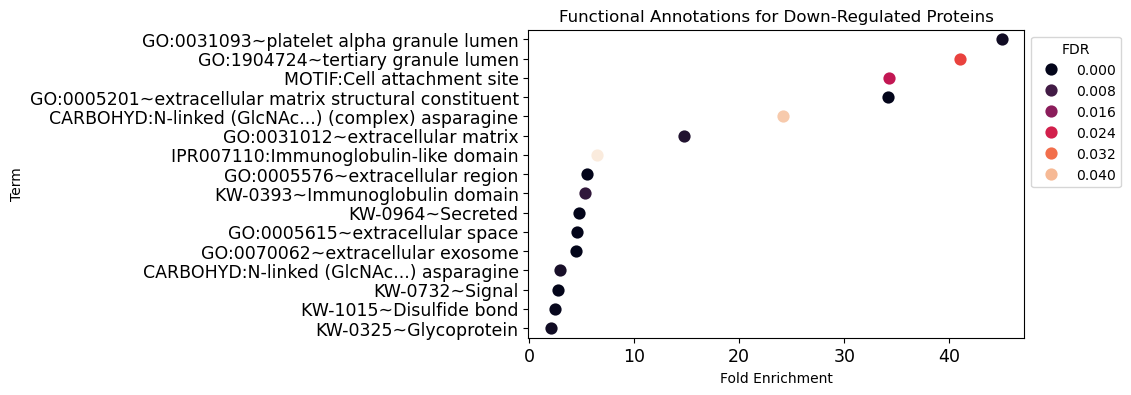

In [5]:
# Upload CSV and Clean
df = pd.read_csv(David)
df = df.sort_values('Category')
df = df.round(3)

# Print Parameter selections
print('PValue <= 0.05, ' + str(df[df['PValue'] < 0.055].shape[0]))
print('FDR <= 0.05, ' + str(df[df['FDR'] < 0.055].shape[0]))
print('Bonferroni <= 0.05, ' + str(df[df['Bonferroni'] < 0.055].shape[0]))
print('Fold Enrichment > 0, ' + str(df[df['Fold Enrichment'] > 0].shape[0]))
print('Fold Enrichment > 10, ' + str(df[df['Fold Enrichment'] > 10].shape[0]))
print('Fold Enrichment > 20, ' + str(df[df['Fold Enrichment'] > 20].shape[0]))
print('Fold Enrichment > 30, ' + str(df[df['Fold Enrichment'] > 30].shape[0]))
print('Fold Enrichment > 40, ' + str(df[df['Fold Enrichment'] > 40].shape[0]))

# Choose Parameter and Fold Enrichment for plotting
param = input('Choose Parameter: ')
fold = float(input('Fold Enrichment > : '))

# Filter Dataset
if param == 'PValue':
    df = df[df['PValue'] < 0.055]
elif param == 'FDR':
    df = df[df['FDR'] < 0.055]
else:
    df = df[df['Bonferroni'] < 0.055]

df = df[df['Fold Enrichment'] > fold]

# Plot Figure and Export
plot_order = df.sort_values(by='Fold Enrichment', ascending=False).Term.values
plt.figure().set_figheight(len(plot_order)/4)
ax = sns.pointplot(data=df, y="Term", x="Fold Enrichment", hue = param,
              orient = 'h', order=plot_order, linestyle='none', palette = 'rocket')
plt.title(f'Functional Annotations for {reg}-Regulated {molecule}')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.setp(ax.collections, sizes=[466.66])
ax.tick_params(axis='both', which='major', labelsize=12.5)
plt.savefig(f'{path}/{reg}_goViz.pdf', bbox_inches = 'tight')

## Panther Analysis

In [ ]:
df = pd.read_csv('/Users/wyssuser/Documents/BD2/BDvsCtrl/Proteomics/GO/GO_CC_Up.csv')

In [ ]:
df = df.round(3)
df

In [ ]:
dfp = df.rename(columns={'Client Text Box Input (fold Enrichment)': 'Fold Enrichment', 
                   'Client Text Box Input (FDR)': 'FDR',
                        'GO cellular component complete': 'GO_Cellular_Component'})

In [ ]:
dfp

In [ ]:
dfp['Fold Enrichment'] = dfp['Fold Enrichment'].str.replace(" > ", "").str.replace(' < ', '')
dfp['Fold Enrichment'] = pd.to_numeric(dfp['Fold Enrichment'])

In [ ]:
#dfp = dfp[dfp['Fold Enrichment'] > 10]
dfp = dfp[dfp['FDR'] < 0.055]

In [ ]:
plot_order = dfp.sort_values(by='Fold Enrichment', ascending=False).GO_Cellular_Component.values
plt.figure().set_figheight(12)
ax = sns.pointplot(data=dfp, y='GO_Cellular_Component', x='Fold Enrichment', hue = 'FDR',
              orient = 'h', order=plot_order, join=False, palette = 'rocket', scale=2)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.setp(ax.collections, sizes=5000)
ax.tick_params(axis='both', which='major', labelsize=12.5)
plt.savefig('/Users/wyssuser/Documents/BD2/BDvsCtrl/Proteomics/GO/GO_CC_Up.pdf', bbox_inches = 'tight')

In [ ]:
dfp

In [ ]:
df = pd.read_csv('/Users/wyssuser/Documents/Endometrioma/Endometrioma_Biomarker_Discovery/MTvsCtrl.csv')

In [ ]:
df = df.round(2)

dfp = df.rename(columns={'Client Text Box Input (fold Enrichment)': 'Fold Enrichment', 
                   'Client Text Box Input (P-value)': 'P-value',
                        'GO biological process complete': 'Term'})

dfp['Fold Enrichment'] = dfp['Fold Enrichment'].str.replace(" > ", "").str.replace(' < ', '')
dfp['Fold Enrichment'] = pd.to_numeric(dfp['Fold Enrichment'])

In [ ]:
dfp = dfp[dfp['Fold Enrichment'] > 40]

In [ ]:
plot_order = dfp.sort_values(by='Fold Enrichment', ascending=False).Term.values
plt.figure().set_figheight(4)
ax = sns.pointplot(data=dfp, y='Term', x='Fold Enrichment', hue = 'FDR',
              orient = 'h', order=plot_order, join=False, palette = 'rocket')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.setp(ax.collections, sizes=[50])
ax.tick_params(axis='both', which='major', labelsize=12.5)
plt.savefig('foobar.pdf', bbox_inches = 'tight')

In [ ]:
df.head(10)